<a href="https://colab.research.google.com/github/irfqn/MachineLearningTasks/blob/main/2ndWeekTasks/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANALISA DATA NASIONAL NUTRION**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

# Contoh membaca file CSV
import pandas as pd

# Ganti 'nama_file.csv' dengan nama file dataset Anda
file_path = '/content/drive/MyDrive/Dataset/Comprehensive National Nutrition Survey (CNNS) 2016-18  Key Anthropometric Indicators by Sex.csv'

# Membaca file CSV ke DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())


   Rowid Country  State lgd code              State  Yearcode  \
0      1   India               1  Jammu And Kashmir      2018   
1      2   India               1  Jammu And Kashmir      2018   
2      3   India               2   Himachal Pradesh      2018   
3      4   India               2   Himachal Pradesh      2018   
4      5   India               3             Punjab      2018   

                              Year  From year  Gender  \
0  Calendar Year (Jan - Dec), 2018       2016  Female   
1  Calendar Year (Jan - Dec), 2018       2016    Male   
2  Calendar Year (Jan - Dec), 2018       2016  Female   
3  Calendar Year (Jan - Dec), 2018       2016    Male   
4  Calendar Year (Jan - Dec), 2018       2016  Female   

   Stunted (height for age) children under the age of 5 years (%)  \
0                                               13.8                
1                                               17.4                
2                                               23.6       

In [ ]:
df

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [ ]:
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


## **MEMVISUALISASIKAN DATA**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

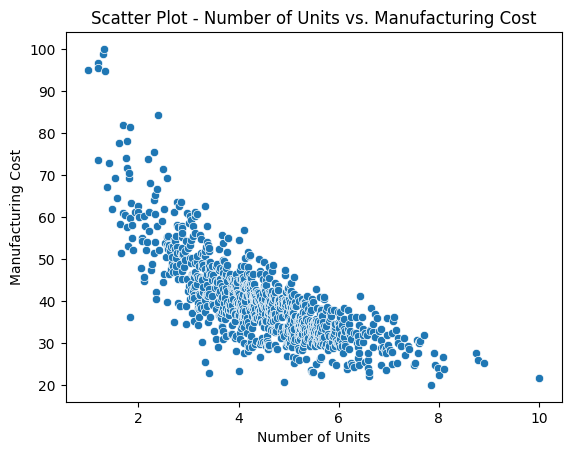

In [ ]:
sns.scatterplot(x='Number of Units', y='Manufacturing Cost', data=df)
plt.title('Scatter Plot - Number of Units vs. Manufacturing Cost')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.show()

## **MEMBUAT MODEL DENGAN POLYNOMIAL REGRESSION**

In [ ]:
# Define kolom label (X) dan kolom target (y)
X = df['Number of Units']  # Kolom label
y = df['Manufacturing Cost']  # Kolom target

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Degree 1 - MSE: 47.22


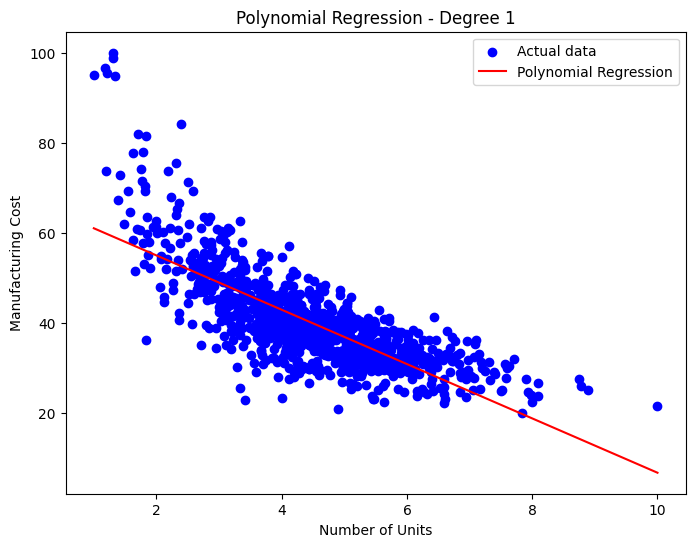

Degree 2 - MSE: 37.57


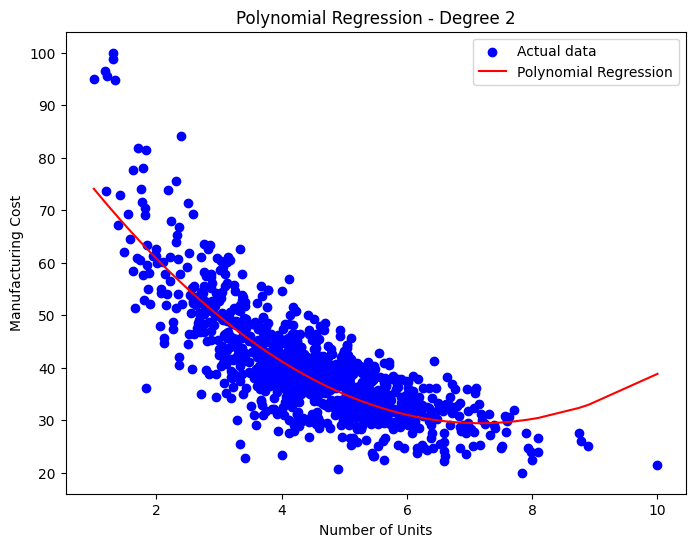

Degree 3 - MSE: 35.07


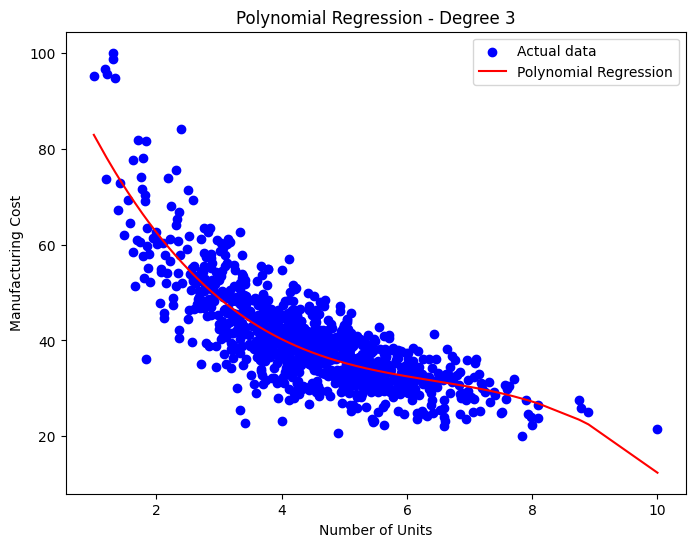

Degree 4 - MSE: 34.41


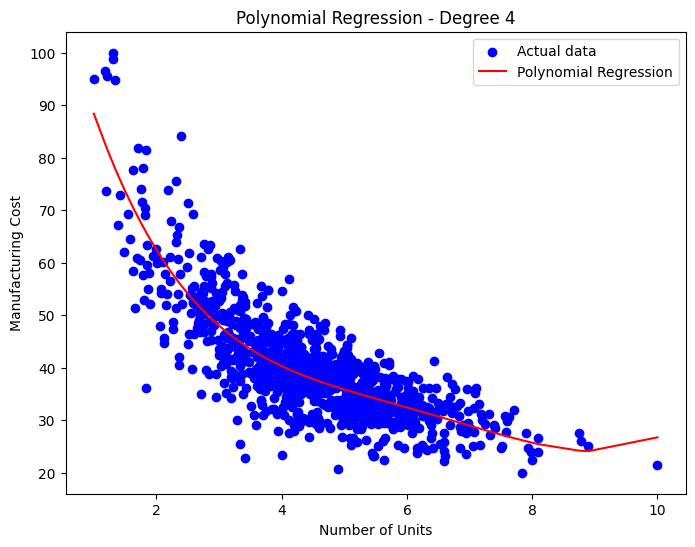

Degree 5 - MSE: 34.08


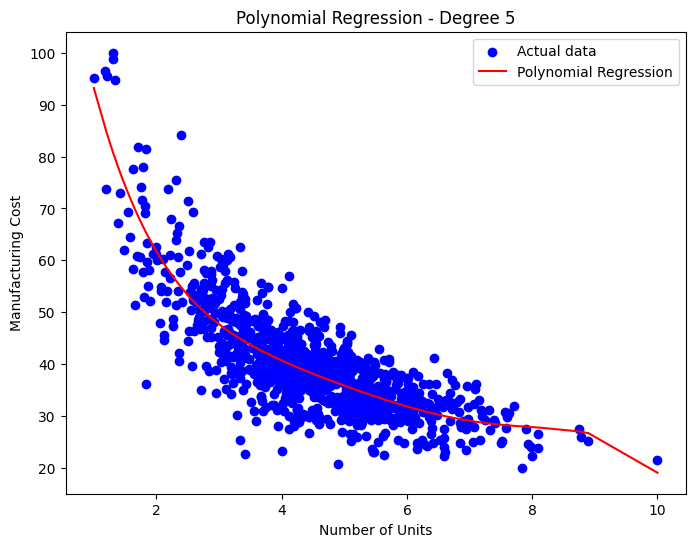

Degree 6 - MSE: 33.89


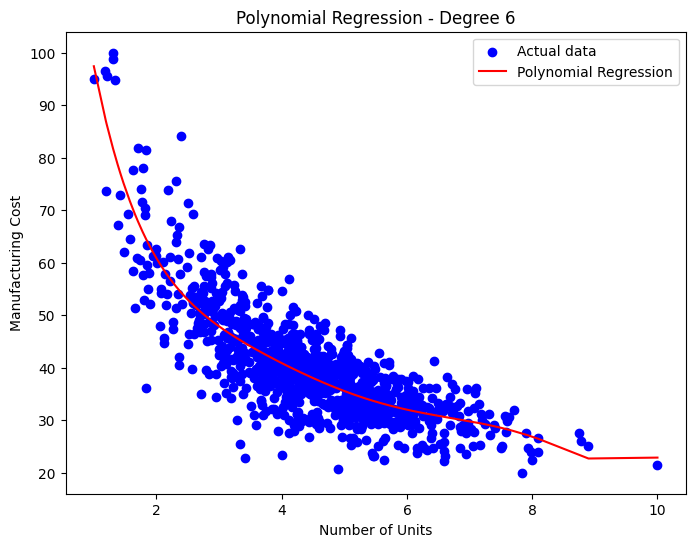

Degree 7 - MSE: 33.78


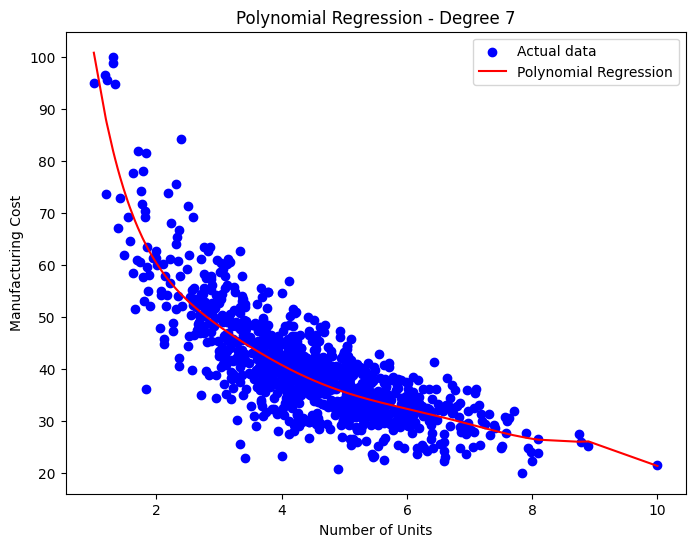

Degree 8 - MSE: 33.70


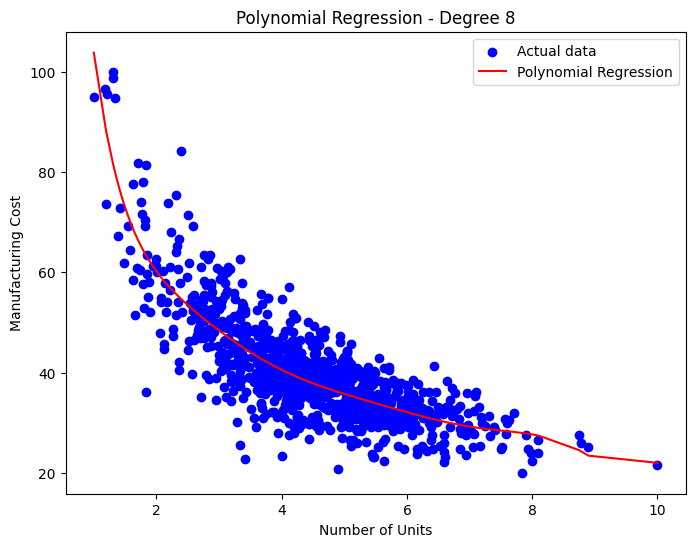

Degree 9 - MSE: 33.61


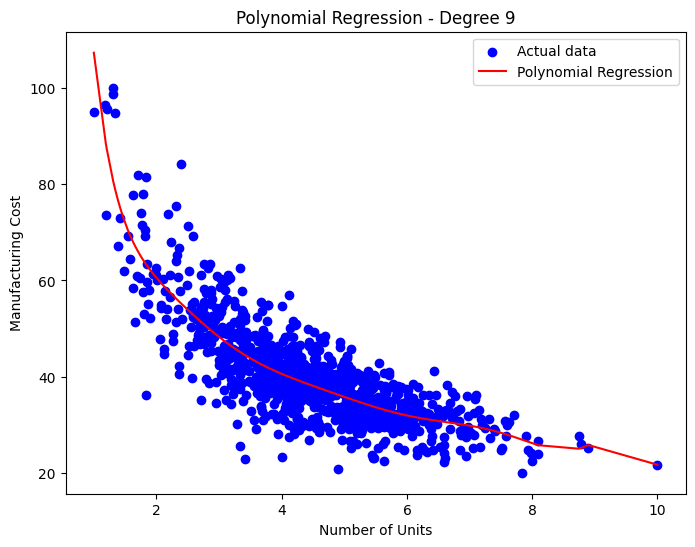

Degree 10 - MSE: 33.41


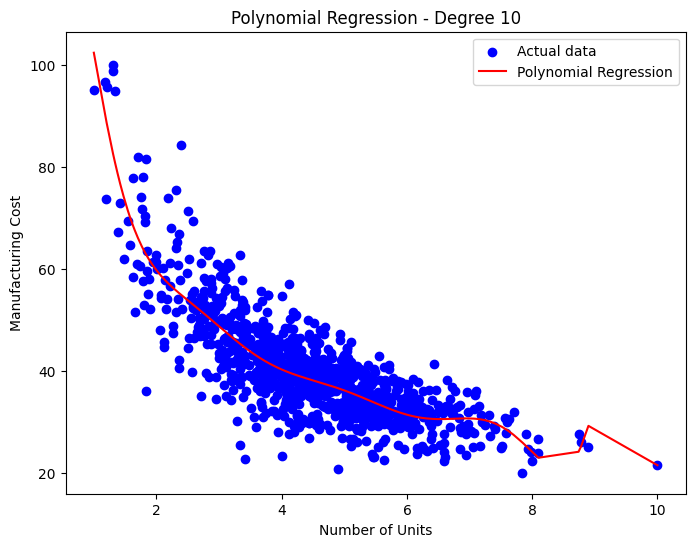

Degree 11 - MSE: 33.13


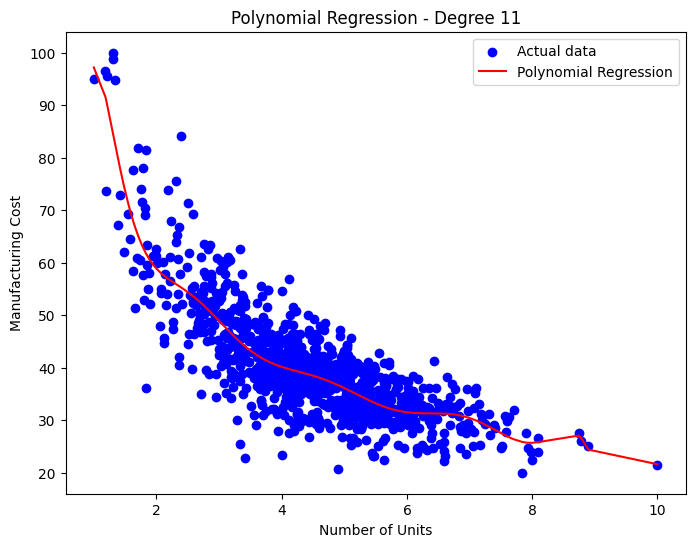

In [ ]:
def polynomial_regression(degree):
    # Membuat fitur polynomial
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Membuat model Polynomial Regression
    model = LinearRegression()
    model.fit(X_poly, y)

    # Memprediksi dengan model
    y_pred = model.predict(X_poly)

    # Menghitung MSE (Mean Squared Error) sebagai metrik performa
    mse = mean_squared_error(y, y_pred)
    print(f'Degree {degree} - MSE: {mse:.2f}')

    # Plot hasil prediksi
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Actual data')
    plt.plot(X, y_pred, color='red', label='Polynomial Regression')
    plt.title(f'Polynomial Regression - Degree {degree}')
    plt.xlabel('Number of Units')
    plt.ylabel('Manufacturing Cost')
    plt.legend()
    plt.show()

# Melakukan Polynomial Regression untuk derajat 1 hingga 8
for degree in range(1, 12):
    polynomial_regression(degree)